In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("Credit Card Default.csv", index_col=0)
df

,income,age,loan,default
clientid,,,,
1,66155.92510,59.017015,8106.532131,0
2,34415.15397,48.117153,6564.745018,0
3,57317.17006,63.108049,8020.953296,0
4,42709.53420,45.751972,6103.642260,0
5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1996,59221.04487,48.518179,1926.729397,0
1997,69516.12757,23.162104,3503.176156,0
1998,44311.44926,28.017167,5522.786693,1


### Check and Remove NA values

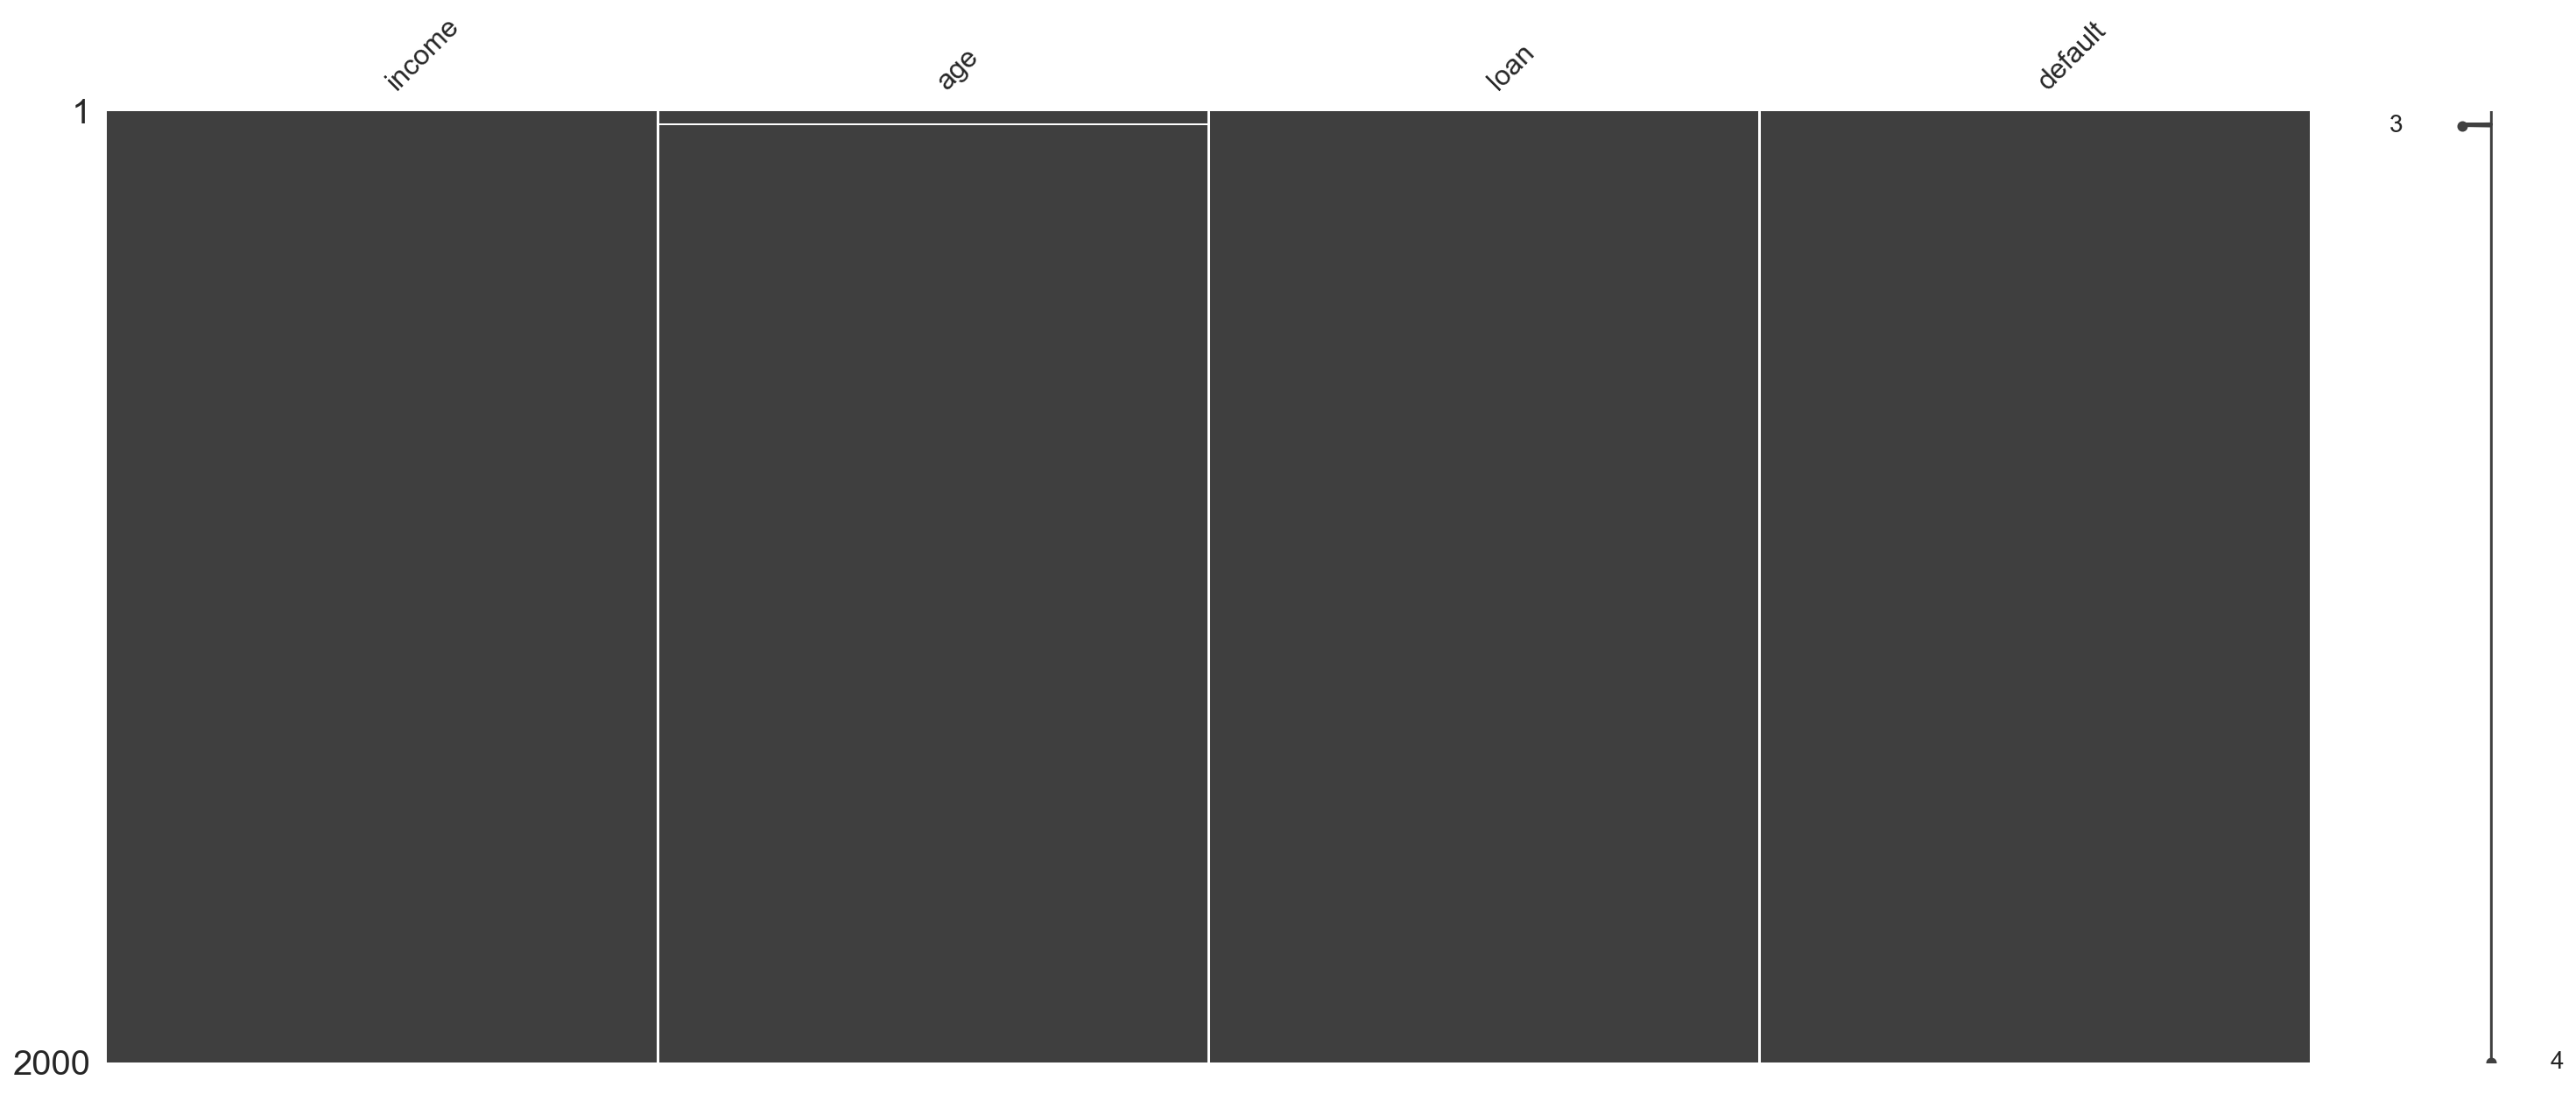

In [8]:
import missingno as msno

msno.matrix(df)
plt.show()

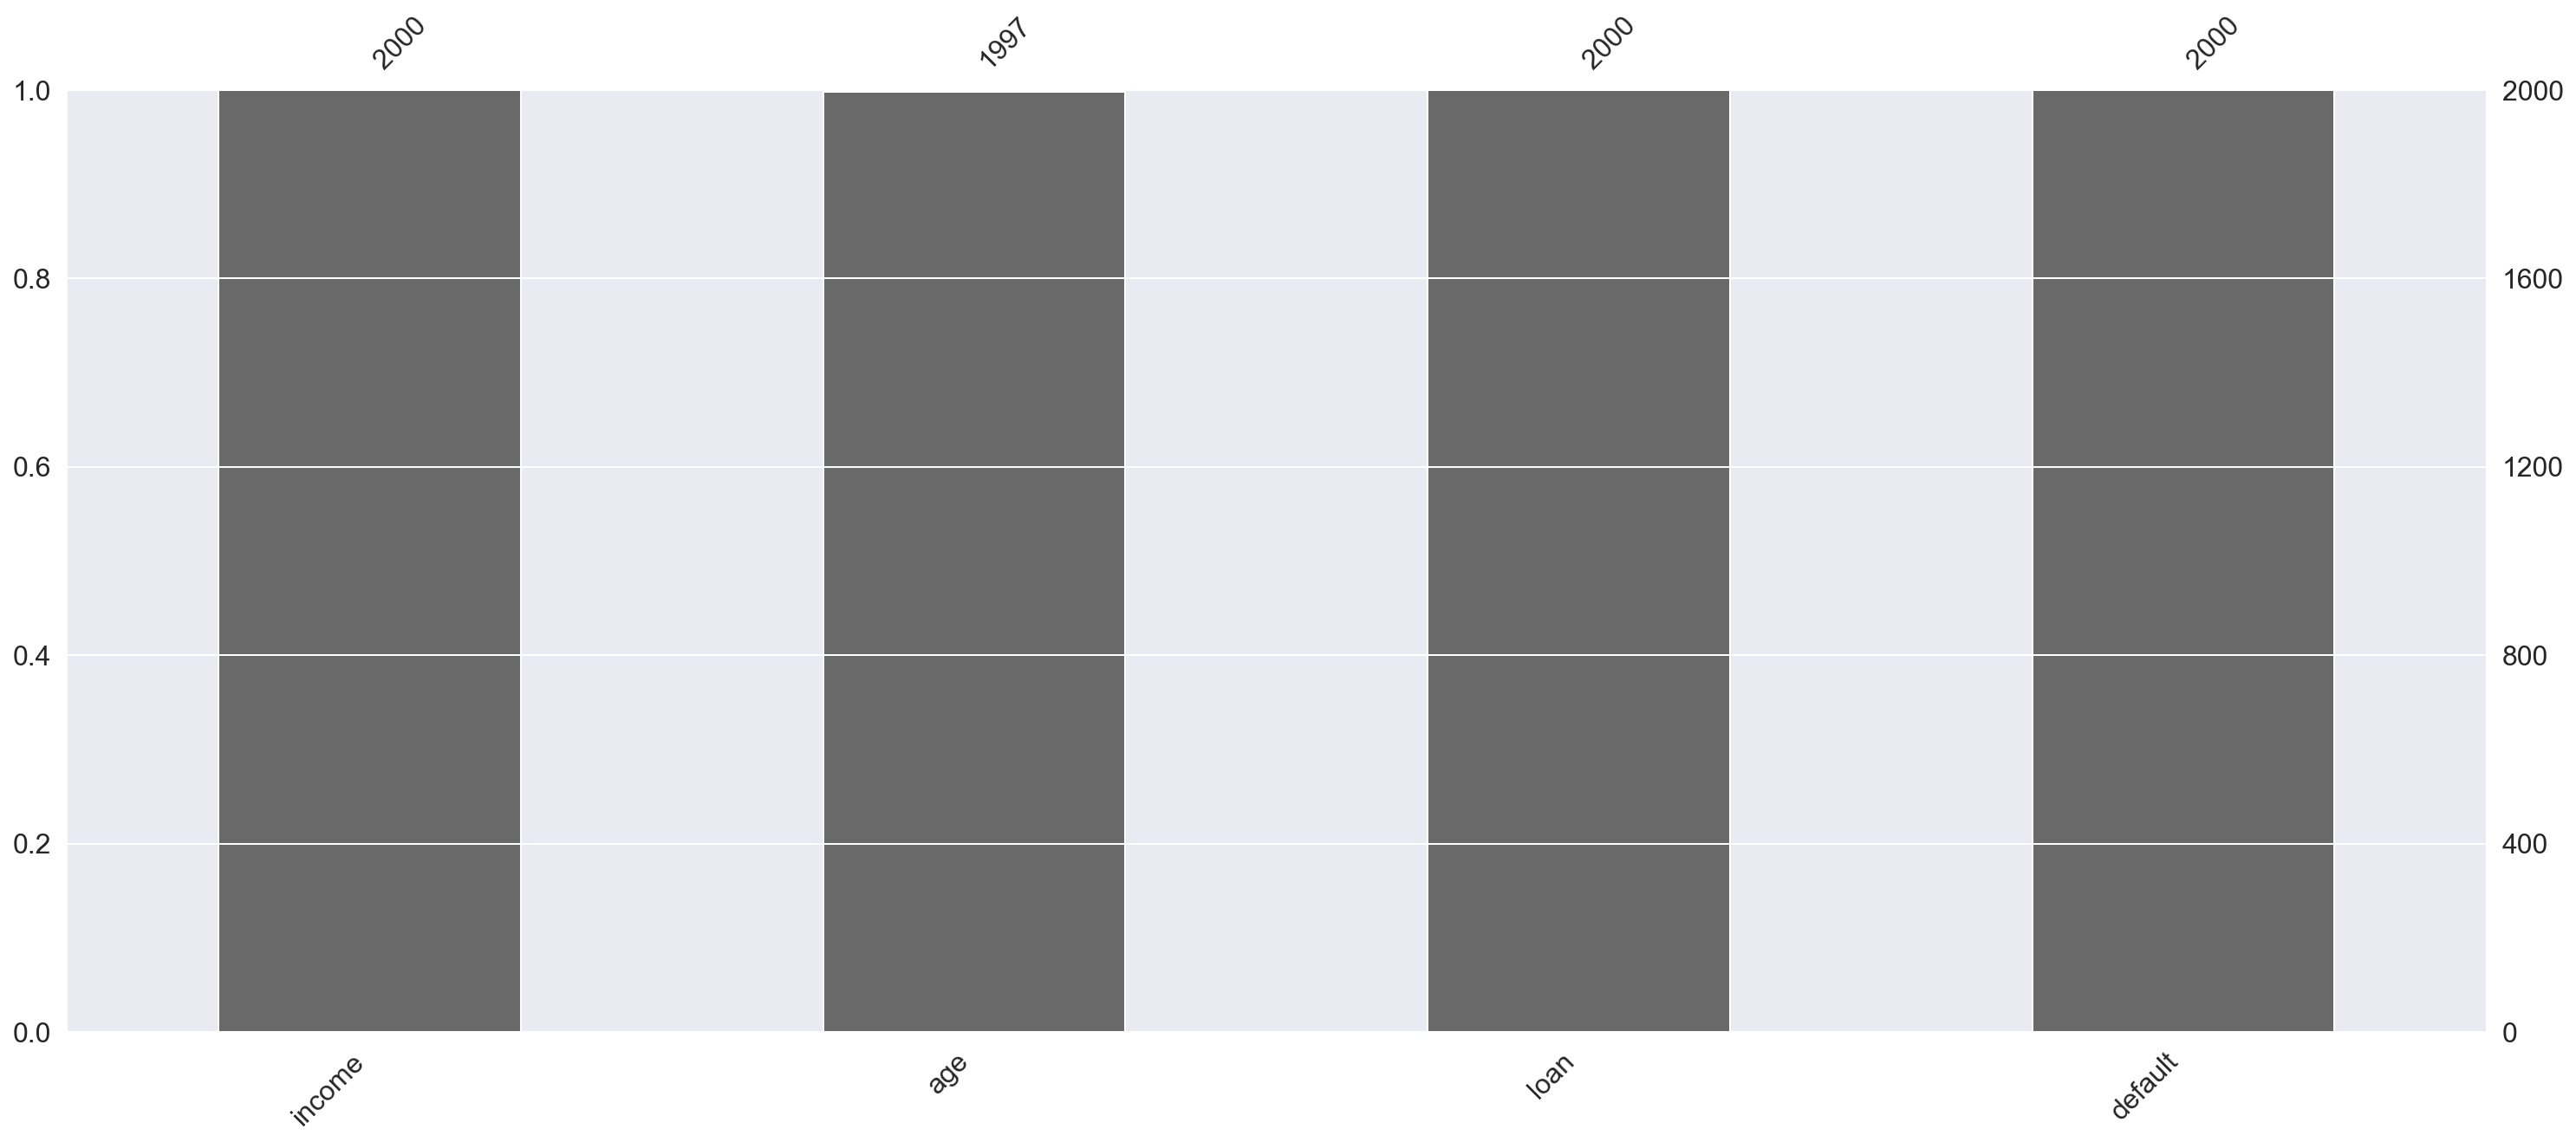

In [9]:
msno.bar(df)
plt.show()

In [12]:
pd.isna(df).sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [14]:
pd.isna(df)["age"]

clientid
1       False
2       False
3       False
4       False
5       False
        ...  
1996    False
1997    False
1998    False
1999    False
2000    False
Name: age, Length: 2000, dtype: bool

In [19]:
df.shape

(2000, 4)

In [16]:
df.loc[pd.isna(df)["age"], ]

,income,age,loan,default
clientid,,,,
29,59417.80541,NaN,2082.625938,0
31,48528.85280,NaN,6155.784670,0
32,23526.30256,NaN,2862.010139,0


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0.0
1,34415.15397,48.117153,6564.745018,0.0
2,57317.17006,63.108049,8020.953296,0.0
3,42709.53420,45.751972,6103.642260,0.0
4,66952.68885,18.584336,8770.099235,1.0
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.0
1996,69516.12757,23.162104,3503.176156,0.0
1997,44311.44926,28.017167,5522.786693,1.0
1998,43756.05660,63.971796,1622.722598,0.0


### Remove Outlier

DBScan

In [34]:
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

In [36]:
DM = cdist(X, X)
np.quantile(DM, 0.1)

4226.169455917746

In [40]:
cluster_model = DBSCAN(eps = 4226, min_samples = 3).fit(X)
print(sum(cluster_model.labels_ == -1)) 

0


IQR

In [28]:
X = df.drop('default', axis = 1)
X.shape

(2000, 3)

In [22]:
import numpy as np
def IQR_rule(val_list): 
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1
    
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    return not_outlier_condition

In [31]:
conditions = X.apply(IQR_rule)
conditions.sum(axis=0)

income    2000
age       1997
loan      1995
dtype: int64

In [47]:
conditions["default"] = True
conditions

,income,age,loan,default
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
1995,True,True,True,True
1996,True,True,True,True
1997,True,True,True,True
1998,True,True,True,True


In [49]:
total_condition = conditions.sum(axis = 1) == len(df.columns) # remove rows which have more than 1 outliers
df = df.loc[total_condition] # remove outlier

In [51]:
df.shape

(1992, 4)

### Scaling

In [73]:
X = df.drop("default", axis=1)
Y = df[["default"]]
X.head()

,income,age,loan
0,66155.92510,59.017015,8106.532131
1,34415.15397,48.117153,6564.745018
2,57317.17006,63.108049,8020.953296
3,42709.53420,45.751972,6103.642260
4,66952.68885,18.584336,8770.099235


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [75]:
# When getting another data set, use this code to use minmax_scaler

Test_X = scaler.transform(Test_X)

In [81]:
X = pd.DataFrame(X, columns=df.columns[:3])

In [82]:
df_processed = pd.concat([X, Y], axis=1)
df_processed.head()

,income,age,loan,default
0,0.923176,0.892092,0.621542,0.0
1,0.288122,0.654708,0.503310,0.0
2,0.746334,0.981189,0.614979,0.0
3,0.454072,0.603198,0.467951,0.0
4,0.939117,0.011524,0.672427,1.0


### Test Train Split

In [85]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.3)
Train_X.shape

(1394, 3)

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(solver= 'lbfgs').fit(Train_X, Train_Y)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [94]:
print('Train Accuracy : ', model.score(Train_X, Train_Y))
print('Test Accuracy : ',model.score(Test_X, Test_Y))

Train Accuracy :  0.9375896700143472
Test Accuracy :  0.9331103678929766


In [96]:
np.linspace(0, 10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameters = {'penalty':('l1', 'l2'), 'C':np.linspace(0, 10)}
model= LogisticRegression()
clf = GridSearchCV(model, parameters)
clf.fit(Train_X, Train_Y)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on thi

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-package

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-package

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
                         'penalty': ('l1', 'l2')})

In [101]:
clf.best_params_

{'C': 3.8775510204081636, 'penalty': 'l2'}

In [102]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(C=3.8775510204081636, penalty='l2').fit(Train_X, Train_Y)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [103]:
print('Test Accuracy : ',model.score(Test_X, Test_Y))

Test Accuracy :  0.9381270903010034


In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(model.predict(Test_X), Test_Y)

array([[504,  27],
       [ 10,  57]])

In [106]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(Test_X), Test_Y))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       531
         1.0       0.68      0.85      0.75        67

    accuracy                           0.94       598
   macro avg       0.83      0.90      0.86       598
weighted avg       0.95      0.94      0.94       598



In [113]:
X.shape

(1992, 3)

In [117]:
model.coef_.T.reshape(-1)

array([-5.9748084 , -9.45368463, 12.0585913 ])

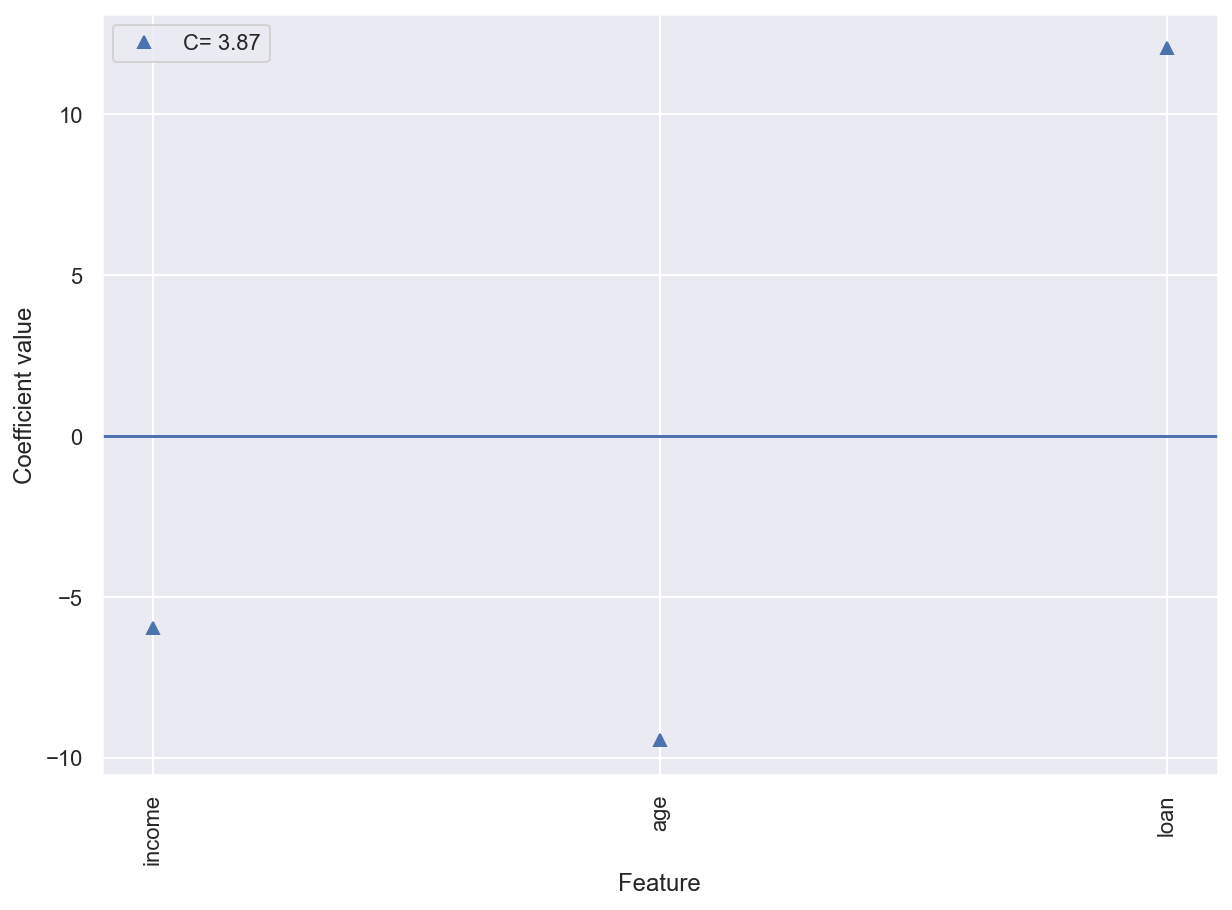

In [124]:
plt.figure(figsize= (10,7))

plt.plot(model.coef_.T, '^b', label="C= 3.87")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=123)
model.fit(Train_X, Train_Y)

train_acc = model.score(Train_X, Train_Y)
test_acc = model.score(Test_X, Test_Y)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.973


<ipython-input-125-333b1ee50696>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Train_X, Train_Y)


In [126]:
estimator = RandomForestClassifier(random_state=123)

max_depth = [ depth for depth in range(1, 8) ]
min_split = [ split for split in range(1, 10) ]
trees = [ tree *10 for tree in range(1, 11) ]

param_grids = {"max_depth": max_depth,
             "min_samples_split": min_split,
             "n_estimators":trees}

model_grid = GridSearchCV(estimator, param_grid=param_grids, scoring="accuracy", n_jobs = -1)
model_grid.fit(Train_X, Train_Y)

print("best estimator: {}".format(model_grid.best_estimator_))
print("best parameters: {}".format(model_grid.best_params_))
print("best score: {}".format(model_grid.best_score_.round(3)))

best estimator: RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=70,
                       random_state=123)
best parameters: {'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 70}
best score: 0.986


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808  0.8586808  0.8586808
 0.8586808  0.8586808  0.8586808  0.8586808 

In [129]:
model_opt = RandomForestClassifier(max_depth= 7,
             min_samples_split=3,
             n_estimators= 70 ,random_state=123)
model_opt.fit(Train_X, Train_Y)

train_acc = model_opt.score(Train_X, Train_Y)
test_acc = model_opt.score(Test_X, Test_Y)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 0.997
Test Accuracy: 0.970


<ipython-input-129-b3f8609b81ac>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_opt.fit(Train_X, Train_Y)


In [130]:
from sklearn.metrics import classification_report

print(classification_report(model_opt.predict(Test_X), Test_Y))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       524
         1.0       0.83      0.95      0.89        74

    accuracy                           0.97       598
   macro avg       0.91      0.96      0.93       598
weighted avg       0.97      0.97      0.97       598



In [131]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [132]:
estimator = GradientBoostingClassifier(random_state=123)

max_depth = [ depth for depth in range(1, 8) ]
trees = [ tree *10 for tree in range(1, 11) ]

param_grids = {"max_depth": max_depth,
             "n_estimators":trees}

model_grid = GridSearchCV(estimator, param_grid=param_grids, scoring="accuracy", n_jobs = -1)
model_grid.fit(Train_X, Train_Y)

print("best estimator: {}".format(model_grid.best_estimator_))
print("best parameters: {}".format(model_grid.best_params_))
print("best score: {}".format(model_grid.best_score_.round(3)))

best estimator: GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=123)
best parameters: {'max_depth': 5, 'n_estimators': 50}
best score: 0.986


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [133]:
model_opt = GradientBoostingClassifier(max_depth= 5,
             n_estimators= 50 ,random_state=123)
model_opt.fit(Train_X, Train_Y)

train_acc = model_opt.score(Train_X, Train_Y)
test_acc = model_opt.score(Test_X, Test_Y)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.990


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [134]:
from sklearn.metrics import classification_report

print(classification_report(model_opt.predict(Test_X), Test_Y))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       514
         1.0       0.96      0.96      0.96        84

    accuracy                           0.99       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.99      0.99      0.99       598



## SVM

In [135]:
from sklearn.svm import SVC

In [138]:
def train_acc(C_value, gamma_value):
    
    svc_final = SVC(kernel= 'rbf' ,gamma = gamma_value , C = C_value , random_state=1234)
    svc_final.fit(Train_X, Train_Y)
    
   # Validation
    y_pred = svc_final.predict(Test_X)
    acc= svc_final.score(Test_X, Test_Y)
    
    return acc

In [140]:
from bayes_opt import BayesianOptimization

pbounds = {'C_value': (0.01, 10) , 'gamma_value': (0.01, 10) } # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc ,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 50 )  #n_iter 초기 point를 제외하고 시행할 횟수 purples are maximize value.-> we can use final value.

|   iter    |  target   |  C_value  | gamma_... |
-------------------------------------------------
|  1        |  0.9849   |  4.176    |  7.206    |
|  2        |  0.8595   |  0.01114  |  3.03     |
|  3        |  0.9649   |  1.476    |  0.9325   |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

|  4        |  0.9799   |  1.871    |  3.462    |
|  5        |  0.9883   |  3.974    |  5.393    |
|  6        |  0.9883   |  3.812    |  5.573    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

|  7        |  0.9833   |  3.719    |  2.931    |
|  8        |  0.9849   |  6.612    |  6.282    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  9        |  0.99     |  6.403    |  8.862    |
|  10       |  0.9916   |  8.702    |  8.091    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  11       |  0.9866   |  9.515    |  5.76     |
|  12       |  0.9883   |  10.0     |  10.0     |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  13       |  0.99     |  4.032    |  10.0     |
|  14       |  0.9732   |  1.666    |  9.022    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  15       |  0.9916   |  7.849    |  9.992    |
|  16       |  0.9866   |  7.884    |  3.294    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  17       |  0.9866   |  10.0     |  1.574    |
|  18       |  0.9682   |  7.458    |  0.4606   |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  19       |  0.9866   |  10.0     |  3.687    |
|  20       |  0.9314   |  4.264    |  0.04     |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  21       |  0.9883   |  5.956    |  4.023    |
|  22       |  0.9783   |  1.626    |  6.384    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  23       |  0.9064   |  0.03181  |  9.995    |
|  24       |  0.9247   |  9.958    |  0.01201  |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  25       |  0.9833   |  7.896    |  5.034    |
|  26       |  0.9916   |  10.0     |  7.619    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  27       |  0.9816   |  2.81     |  4.454    |
|  28       |  0.99     |  5.676    |  10.0     |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  29       |  0.9849   |  3.196    |  8.477    |
|  30       |  0.9866   |  6.244    |  2.282    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  31       |  0.9849   |  8.88     |  2.188    |
|  32       |  0.99     |  8.128    |  6.858    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  33       |  0.99     |  5.012    |  8.628    |
|  34       |  0.99     |  9.998    |  8.86     |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  35       |  0.99     |  7.149    |  7.781    |
|  36       |  0.9883   |  10.0     |  2.561    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  37       |  0.9849   |  5.206    |  5.985    |
|  38       |  0.9783   |  2.603    |  2.366    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  39       |  0.9916   |  8.869    |  9.484    |
|  40       |  0.9766   |  2.368    |  7.442    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  41       |  0.9849   |  2.756    |  9.899    |
|  42       |  0.99     |  5.734    |  7.471    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  43       |  0.9849   |  5.078    |  3.276    |
|  44       |  0.9916   |  7.746    |  8.937    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  45       |  0.9866   |  7.472    |  2.099    |
|  46       |  0.8595   |  0.01     |  0.01     |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  47       |  0.8595   |  0.01275  |  6.874    |
|  48       |  0.9799   |  2.462    |  5.899    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  49       |  0.9883   |  6.756    |  3.266    |
|  50       |  0.99     |  10.0     |  6.565    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  51       |  0.9916   |  6.741    |  9.996    |
|  52       |  0.9833   |  10.0     |  4.914    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


|  53       |  0.99     |  9.161    |  6.95     |
|  54       |  0.9849   |  8.914    |  4.108    |
|  55       |  0.9866   |  4.256    |  4.074    |


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [143]:
svc_final = SVC(kernel= 'rbf',  gamma = 8.091  ,  C =  8.702, random_state=1234)
svc_final.fit(Train_X, Train_Y)

# Validation
y_pred = svc_final.predict(Test_X)

# train data set accuracy
print("Train Accuracy: {:.3f}".format(svc_final.score(Train_X, Train_Y)))
# test data set accuracy
print("Test Accuracy: {:.3f}\n".format(svc_final.score(Test_X, Test_Y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(Test_Y, y_pred)))

Train Accuracy: 0.993
Test Accuracy: 0.992

Confusion matrix: 
[[513   1]
 [  4  80]]


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [145]:
from sklearn.metrics import classification_report

print(classification_report(svc_final.predict(Test_X), Test_Y))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       517
         1.0       0.95      0.99      0.97        81

    accuracy                           0.99       598
   macro avg       0.98      0.99      0.98       598
weighted avg       0.99      0.99      0.99       598

